In [302]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#uci 
#This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades,
#demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are 
#provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008],
#the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a
#strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 
#correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful 
df1 = pd.read_csv('student_por.csv', delimiter=';')

#kaggle
#The data was collected from the Faculty of Engineering and Faculty of Educational Sciences students in 2019. The purpose is to predict
#students' end-of-term performances using ML techniques.
df2 = pd.read_csv('student_prediction.csv')

In [303]:
# Data Cleaning
# Check for missing values
print(df1.isnull().values.any())
print(df2.isnull().values.any())

False
False


In [304]:
# Checking for duplicates in each dataset
duplicates1 = df1.duplicated().sum()
print(f'Number of duplicate rows in dataset1: {duplicates1}')

duplicates2 = df2.duplicated().sum()
print(f'Number of duplicate rows in dataset2: {duplicates2}')

Number of duplicate rows in dataset1: 0
Number of duplicate rows in dataset2: 0


In [305]:
# Check data types
print(df1.dtypes)
print(df2.dtypes)

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object
STUDENTID        object
AGE               int64
GENDER            int64
HS_TYPE           int64
SCHOLARSHIP       int64
WORK              int64
ACTIVITY          int64
PARTNER           int64
SALARY            int64
TRANSPORT         int64
LIVING            int64
MOTHER_EDU        int64
FATHE

In [306]:
# Display Dataset 1
display(df1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


In [307]:
# Display Dataset # 2
display(df2)

,STUDENTID,AGE,GENDER,HS_TYPE,SCHOLARSHIP,WORK,ACTIVITY,PARTNER,SALARY,TRANSPORT,...,PREP_STUDY,PREP_EXAM,NOTES,LISTENS,LIKES_DISCUSS,CLASSROOM,CUML_GPA,EXP_GPA,COURSE ID,GRADE
0,STUDENT1,2,2,3,3,1,2,2,1,1,...,1,1,3,2,1,2,1,1,1,1
1,STUDENT2,2,2,3,3,1,2,2,1,1,...,1,1,3,2,3,2,2,3,1,1
2,STUDENT3,2,2,2,3,2,2,2,2,4,...,1,1,2,2,1,1,2,2,1,1
3,STUDENT4,1,1,1,3,1,2,1,2,1,...,1,2,3,2,2,1,3,2,1,1
4,STUDENT5,2,2,1,3,2,2,1,3,1,...,2,1,2,2,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,STUDENT141,2,1,2,3,1,1,2,1,1,...,1,1,2,1,2,1,3,3,9,5
141,STUDENT142,1,1,2,4,2,2,2,1,4,...,1,1,3,2,2,1,5,3,9,5
142,STUDENT143,1,1,1,4,2,2,2,1,1,...,1,1,3,3,2,1,4,3,9,1
143,STUDENT144,2,1,2,4,1,1,1,5,2,...,2,1,2,1,2,1,5,3,9,4


In [308]:
# Data Preprocessing

# Column Renaming

# Rename columns in df2 for consistency (including 'GRADE' to 'final_grade')
df2.rename(columns={
    'GENDER': 'sex',
    'AGE': 'age',
    'MOTHER_EDU': 'Medu',
    'FATHER_EDU': 'Fedu',
    'MOTHER_JOB': 'Mjob',
    'FATHER_JOB': 'Fjob',
    'STUDY_HRS': 'studytime',
    'ACTIVITY': 'activities',
    'PARTNER': 'romantic',
    'ATTEND': 'attendance',
    'KIDS': 'Pstatus',
    'CUML_GPA': 'gpa',
    'GRADE': 'final_grade'  # Rename 'GRADE' here
}, inplace=True)



In [309]:
# Categorical Encoding and Categorization

# Encode 'sex' column in df1 (1: Female, 2: Male) - Categorical Encoding
sex_mapping = {'F': 1, 'M': 2}
df1['sex'] = df1['sex'].replace(sex_mapping)

/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_2571/1159468391.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['sex'] = df1['sex'].replace(sex_mapping)


In [310]:
# Binning of 'age' column in df1 into groups (0: ages 15-17, 1: ages 18-21, 2: age 22) - Categorization
age_mapping = {15: 0, 16: 0, 17: 0, 18: 1, 19: 1, 20: 1, 21: 1, 22: 2}
df1['age'] = df1['age'].replace(age_mapping)

In [311]:
# Encode 'Pstatus' column in df1 (1: married, 2: divorced) - Categorical Encoding
cohab_mapping = {'T': 1, 'A': 2}  # T: married, A: divorced
df1['Pstatus'] = df1['Pstatus'].replace(cohab_mapping)

/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_2571/3264519391.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Pstatus'] = df1['Pstatus'].replace(cohab_mapping)


In [312]:
# Encode 'activities' and 'romantic' columns in df1 (1: yes, 2: no) - Categorical Encoding
activity_mapping = {'yes': 1, 'no': 2}
df1['activities'] = df1['activities'].replace(activity_mapping)
df1['romantic'] = df1['romantic'].replace(activity_mapping)


/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_2571/2090562399.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['activities'] = df1['activities'].replace(activity_mapping)
/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_2571/2090562399.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['romantic'] = df1['romantic'].replace(activity_mapping)


In [313]:
# Encode 'Mjob' and 'Fjob' columns in df1 using predefined numerical mappings - Categorical Encoding
job_mapping = {
    'teacher': 3,
    'health': 2,
    'services': 3,
    'at_home': 2,
    'other': 6
}
df1['Mjob'] = df1['Mjob'].replace(job_mapping)  # Encode mother's job
df1['Fjob'] = df1['Fjob'].replace(job_mapping)  # Encode father's job


/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_2571/827165596.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Mjob'] = df1['Mjob'].replace(job_mapping)  # Encode mother's job
/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_2571/827165596.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Fjob'] = df1['Fjob'].replace(job_mapping)  # Encode father's job


In [314]:
# Categorize 'absences' into 'attendance' in df1
def categorize_absences(absences):
    if absences == 0:
        return 1  # Always attends
    elif 1 <= absences <= 10:
        return 2  # Sometimes absent
    else:
        return 3  # Frequently absent

df1['attendance'] = df1['absences'].apply(categorize_absences)

In [315]:
# Calculate 'average_grade' from 'G1' and 'G2' in df1
df1['average_grade'] = df1[['G1', 'G2']].mean(axis=1)

# Define grade bins and labels
grade_bins = [-1, 5.99, 10.99, 13.99, 16.99, 20]
grade_labels = [1, 2, 3, 4, 5]

# Categorize 'average_grade' into 'gpa' in df1
df1['gpa'] = pd.cut(df1['average_grade'], bins=grade_bins, labels=grade_labels)

# Convert 'G3' into 'final_grade' in df1
df1['final_grade'] = pd.cut(df1['G3'], bins=grade_bins, labels=grade_labels)

In [316]:
# Processing 'final_grade' in df2

# Map 'final_grade' from 0-7 to 0-20 in df2
df2['numeric_grade'] = (df2['final_grade'] / 7) * 20

### Apply the same binning to 'numeric_grade' to get the new 'final_grade'
df2['final_grade'] = pd.cut(df2['numeric_grade'], bins=grade_bins, labels=grade_labels)

### Drop 'numeric_grade' as it's no longer needed
df2.drop(columns=['numeric_grade'], inplace=True)

In [317]:
## Standardization

### Ensure data types are consistent between df1 and df2
columns_to_convert = ['age', 'sex', 'Medu', 'Fedu', 'activities', 'final_grade']
for col in columns_to_convert:
    df1[col] = df1[col].astype(int)
    df2[col] = df2[col].astype(int)

In [318]:
## Data Merging

### Select columns to keep
columns_to_keep = ['sex', 'age', 'Medu', 'Fedu', 'Mjob', 'Fjob',
                   'studytime', 'activities', 'romantic',
                   'attendance', 'Pstatus', 'gpa', 'final_grade']

### Merge df1 and df2
merged_df = pd.concat([df1[columns_to_keep], df2[columns_to_keep]], ignore_index=True)

In [319]:
# Display the merged DataFrame
display(merged_df)

,sex,age,Medu,Fedu,Mjob,Fjob,studytime,activities,romantic,attendance,Pstatus,gpa,final_grade
0,1,1,4,4,2,3,2,2,2,2,2,1,3
1,1,0,1,1,2,6,2,2,2,2,1,2,3
2,1,0,1,1,2,6,2,2,2,2,1,3,3
3,1,0,4,2,2,3,3,1,1,1,1,4,4
4,1,0,3,3,6,6,2,2,2,1,1,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
789,1,2,1,2,2,4,3,1,2,1,2,3,4
790,1,1,1,1,2,1,3,2,2,2,1,5,4
791,1,1,3,4,2,4,2,2,2,1,1,4,1
792,1,2,4,4,3,3,2,1,1,1,1,5,3


In [320]:
from scipy.stats import zscore

# Calculate Z-scores for numerical columns
z_scores = zscore(merged_df[['age', 'Medu', 'Fedu', 'studytime', 'gpa', 'final_grade']])

# Identify outliers (Z-score > 3 or < -3)
outliers_zscore = (z_scores > 3) | (z_scores < -3)

# Show rows with outliers
outliers_data = merged_df[outliers_zscore.any(axis=1)]
print(outliers_data)


     sex  age  Medu  Fedu  Mjob  Fjob  studytime  activities  romantic  \
663    2    3     3     1     4     1          2           1         2   
667    1    1     2     2     2     5          5           2         2   
672    2    3     1     4     2     1          3           1         2   
677    2    3     2     2     2     1          2           2         1   
680    2    3     1     2     2     3          2           2         2   
690    2    3     1     4     2     2          3           2         2   
704    2    3     1     1     2     1          1           2         1   
707    2    3     1     3     2     1          3           2         1   
709    1    2     6     1     2     3          1           2         2   
726    2    1     6     5     4     2          2           2         1   
730    2    3     1     2     2     3          2           2         2   
733    2    3     4     2     2     1          1           2         1   
742    2    1     1     2     2     3 

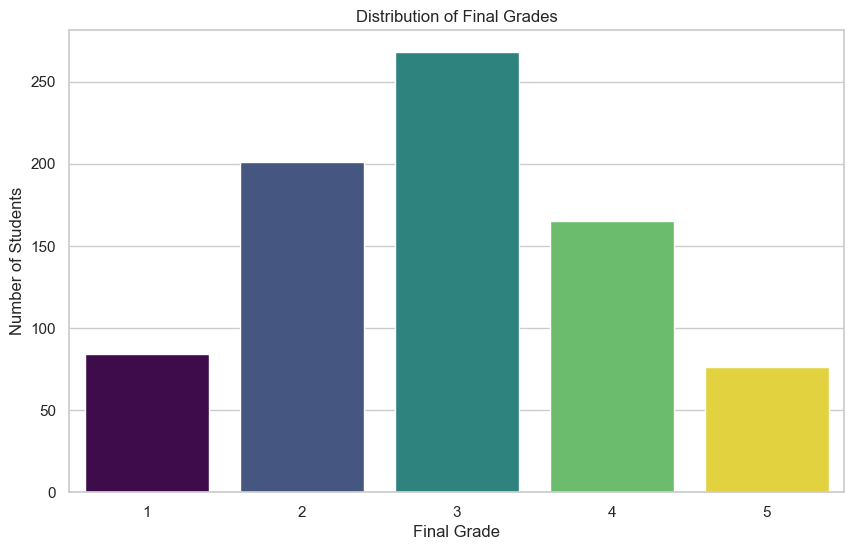

In [321]:
sns.set(style="whitegrid")

# Plot distribution of final grades
plt.figure(figsize=(10,6))
sns.countplot(data=merged_df, x='final_grade', hue='final_grade', palette="viridis", legend=False)
plt.title('Distribution of Final Grades')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.xticks(rotation=0)
plt.show()

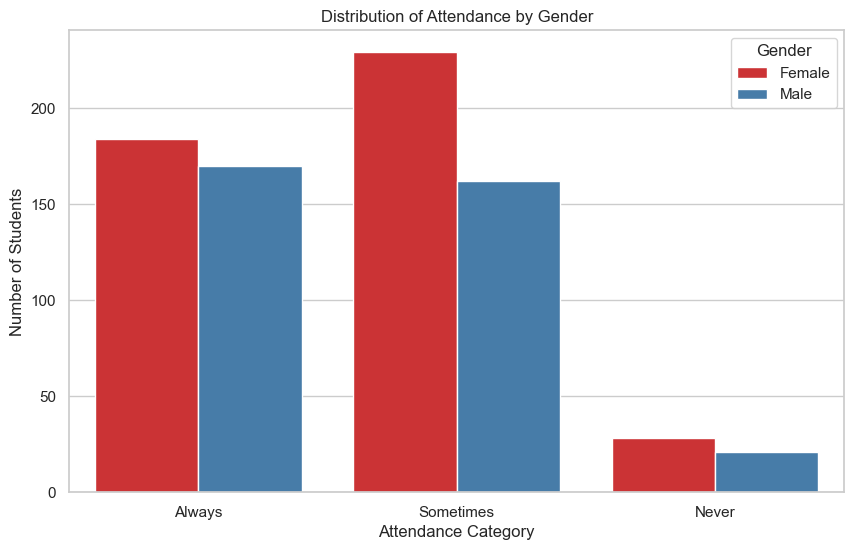

In [322]:
# Create a count plot for attendance by gender
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_df, x='attendance', hue='sex', palette='Set1')

# Customize the plot
plt.title('Distribution of Attendance by Gender')
plt.xlabel('Attendance Category')
plt.ylabel('Number of Students')
plt.xticks(ticks=[0, 1, 2], labels=['Always', 'Sometimes', 'Never'], rotation=0)
plt.legend(title='Gender', labels=['Female', 'Male'])
plt.show()

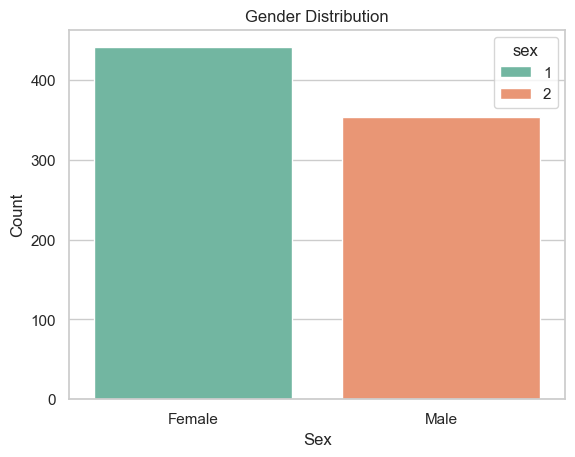

In [323]:
# Chart for distribution of gender
sns.countplot(x='sex', data=merged_df, hue='sex', palette='Set2')

# Labels, 1 for Female and 2 for Male
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

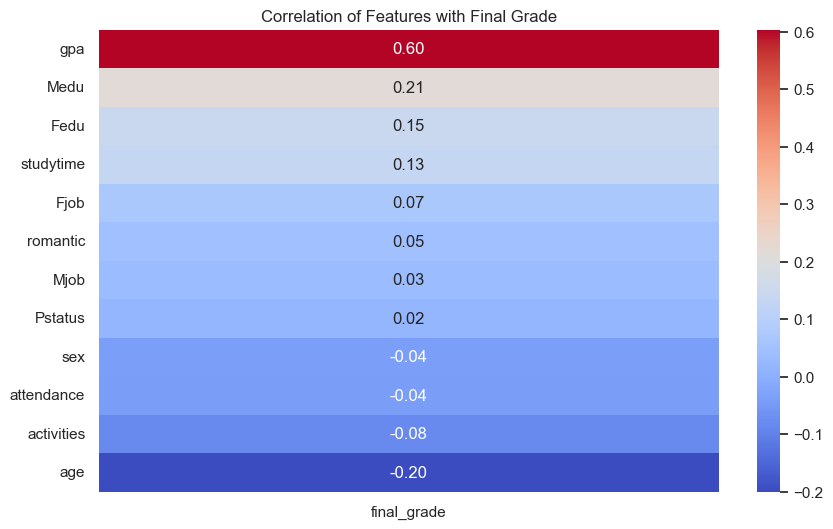

In [324]:
# Heatmap to show correlation of features with final grade

# Calculate a correlation matrix
corr = merged_df.corr()

# The correlation of features with final grade
final_grade_corr = corr['final_grade'].sort_values(ascending=False)

# Drop the final_grade, because it is self correlating
final_grade_corr = final_grade_corr.drop('final_grade')

# Plotting the heat map
plt.figure(figsize=(10,6))
sns.heatmap(final_grade_corr.to_frame(), annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation of Features with Final Grade')
plt.show

/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_2571/3211031209.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age_group', data=merged_df, palette='Set3')


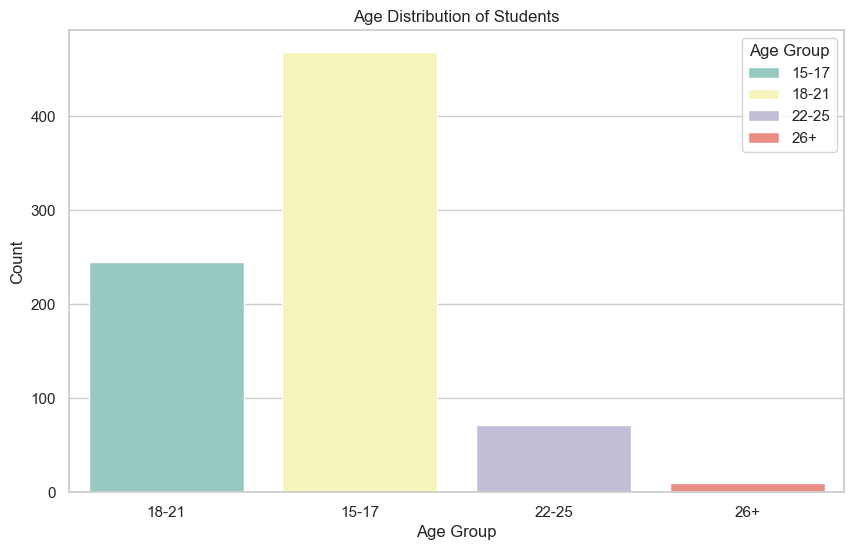

In [325]:
# Create a dictionary to map the binned values to the age groups
age_bin_labels = {0: '15-17', 1: '18-21', 2: '22-25', 3: '26+'}

merged_df['age_group'] = merged_df['age'].map(age_bin_labels)

plt.figure(figsize=(10,6))
sns.countplot(x='age_group', data=merged_df, palette='Set3')

# Add lables and title
plt.title('Age Distribution of Students')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Legend to show the age groups
plt.legend(title='Age Group', labels=['15-17', '18-21', '22-25', '26+'])

plt.show()

# Removing age group column
merged_df = merged_df.drop(columns=['age_group'])

/var/folders/bj/hvx0tsh15fd0h0980bgq9_zc0000gp/T/ipykernel_2571/3696986826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='studytime', y='final_grade', data=df1, palette='Set2')


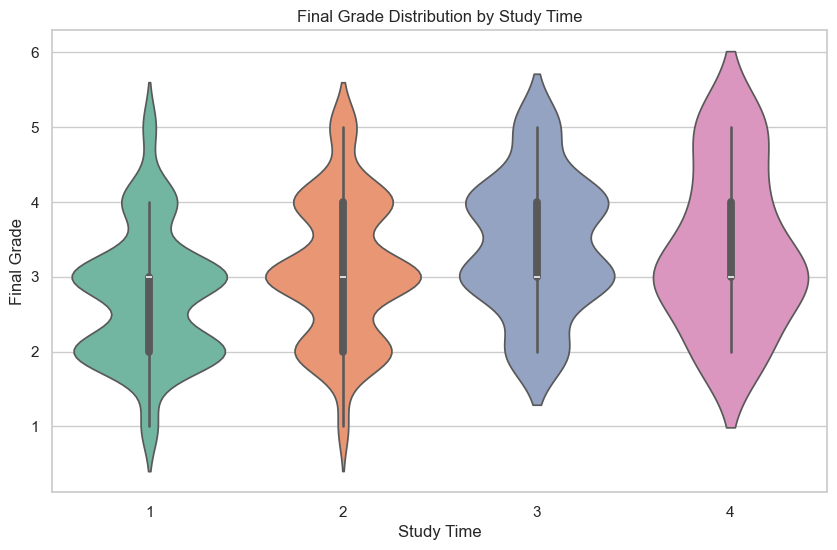

In [326]:
plt.figure(figsize=(10,6))
sns.violinplot(x='studytime', y='final_grade', data=df1, palette='Set2')
plt.title('Final Grade Distribution by Study Time')
plt.xlabel('Study Time')
plt.ylabel('Final Grade')
plt.show()

In [327]:
# Implementing Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Features (dropping age_group used for visualization)
X_merged = merged_df.drop(columns=['final_grade'])
# Target Variable
y_merged = merged_df['final_grade']

# Split data into training and testing sets
X_train_merged, X_test_merged, y_train_merged, y_test_merged = train_test_split(X_merged, y_merged, test_size=0.3, random_state=1)

# Initializing the Decison Tree 
clf_merged = DecisionTreeClassifier(random_state=42, max_depth=4)

# Training model
clf_merged.fit(X_train_merged, y_train_merged)

# Make predictions
y_pred_merged = clf_merged.predict(X_test_merged)

# Evaluate
accuracy = accuracy_score(y_test_merged, y_pred_merged)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.59


In [328]:
#Visualize the decision rules
tree_rules = export_text(clf_merged, feature_names=list(X_merged.columns))
print("\nDecision Tree Rules:")
print(tree_rules)


Decision Tree Rules:
|--- gpa <= 2.50
|   |--- age <= 1.50
|   |   |--- gpa <= 1.50
|   |   |   |--- Fjob <= 2.50
|   |   |   |   |--- class: 2
|   |   |   |--- Fjob >  2.50
|   |   |   |   |--- class: 1
|   |   |--- gpa >  1.50
|   |   |   |--- Medu <= 3.50
|   |   |   |   |--- class: 2
|   |   |   |--- Medu >  3.50
|   |   |   |   |--- class: 3
|   |--- age >  1.50
|   |   |--- Mjob <= 3.50
|   |   |   |--- Fedu <= 2.50
|   |   |   |   |--- class: 1
|   |   |   |--- Fedu >  2.50
|   |   |   |   |--- class: 1
|   |   |--- Mjob >  3.50
|   |   |   |--- class: 3
|--- gpa >  2.50
|   |--- gpa <= 3.50
|   |   |--- age <= 0.50
|   |   |   |--- attendance <= 1.50
|   |   |   |   |--- class: 3
|   |   |   |--- attendance >  1.50
|   |   |   |   |--- class: 3
|   |   |--- age >  0.50
|   |   |   |--- Fjob <= 5.50
|   |   |   |   |--- class: 4
|   |   |   |--- Fjob >  5.50
|   |   |   |   |--- class: 3
|   |--- gpa >  3.50
|   |   |--- gpa <= 4.50
|   |   |   |--- age <= 0.50
|   |   |   |   

In [329]:
# Applying Decision Tree on Original dataset
display(df1)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,Walc,health,absences,G1,G2,G3,attendance,average_grade,gpa,final_grade
0,GP,1,1,U,GT3,2,4,4,2,3,...,1,3,4,0,11,11,2,5.5,1,3
1,GP,1,0,U,GT3,1,1,1,2,6,...,1,3,2,9,11,11,2,10.0,2,3
2,GP,1,0,U,LE3,1,1,1,2,6,...,3,3,6,12,13,12,2,12.5,3,3
3,GP,1,0,U,GT3,1,4,2,2,3,...,1,5,0,14,14,14,1,14.0,4,4
4,GP,1,0,U,GT3,1,3,3,6,6,...,2,5,0,11,13,13,1,12.0,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,1,1,R,GT3,1,2,3,3,6,...,2,5,4,10,11,10,2,10.5,2,2
645,MS,1,1,U,LE3,1,3,1,3,3,...,1,1,4,15,15,16,2,15.0,4,4
646,MS,1,1,U,GT3,1,1,1,6,6,...,1,5,6,11,12,9,2,11.5,3,2
647,MS,2,0,U,LE3,1,3,1,3,3,...,4,2,6,10,10,10,2,10.0,2,2


Accuracy: 1.0


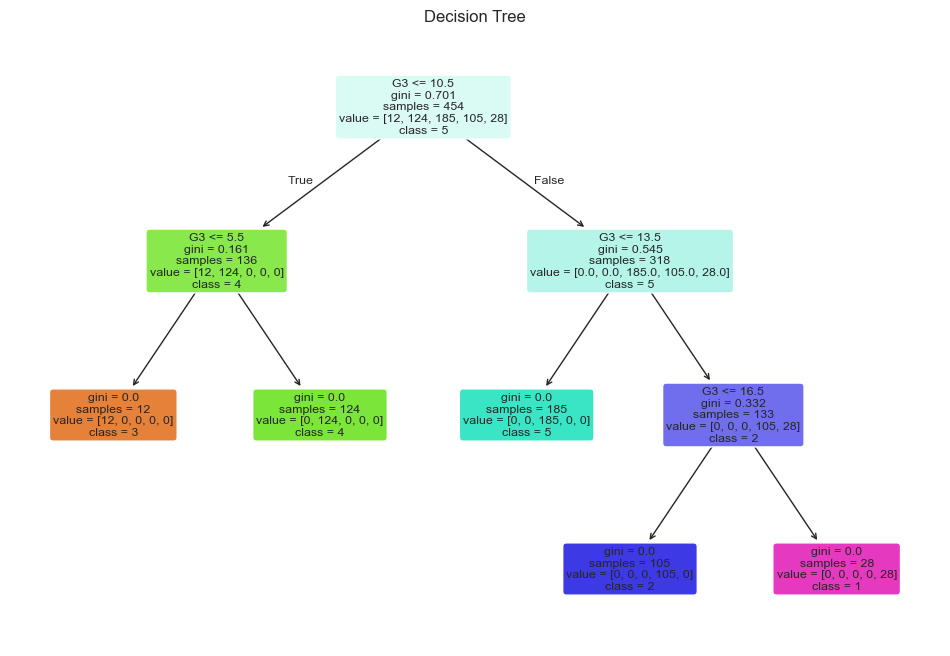

|--- G3 <= 10.50
|   |--- G3 <= 5.50
|   |   |--- class: 1
|   |--- G3 >  5.50
|   |   |--- class: 2
|--- G3 >  10.50
|   |--- G3 <= 13.50
|   |   |--- class: 3
|   |--- G3 >  13.50
|   |   |--- G3 <= 16.50
|   |   |   |--- class: 4
|   |   |--- G3 >  16.50
|   |   |   |--- class: 5



In [330]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import plot_tree

#Encoding categorical values
categorical_columns = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'nursery', 'higher', 'internet', 'romantic']
encoder = LabelEncoder()

for col in categorical_columns:
    df1[col] = encoder.fit_transform(df1[col])


X_df1 = df1.drop('final_grade', axis=1)
y_df1 = df1['final_grade']

# Train - Test split
X_df1_train, X_df1_test, y_df1_train, y_df1_test = train_test_split(X_df1, y_df1, test_size=0.3, random_state=1)

# Training Decision Tree
df1_model = DecisionTreeClassifier(random_state=1, max_depth=5)
df1_model.fit(X_df1_train, y_df1_train)

# Evaluate
y_df1_pred = df1_model.predict(X_df1_test)
df1_accuaracy = accuracy_score(y_df1_test, y_df1_pred)
print('Accuracy:', df1_accuaracy)

# Step 5: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
# Convert class names to strings
class_names = [str(cls) for cls in y_df1.unique()]
plot_tree(df1_model, feature_names=X_df1.columns, class_names=class_names, filled=True, rounded=True)
plt.title("Decision Tree")
plt.show()

# Optional: Export the Tree as Text
tree_rules = export_text(df1_model, feature_names=list(X_df1.columns))
print(tree_rules)
